<a href="https://colab.research.google.com/github/PRITIKA10/DSBDAL/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations
using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values
and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Academic_Performance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [ ]:
df = df.rename( columns={
    "race/ethnicity": "race" ,
    "parental level of education": "parent_edu" ,
    "test preparation course": "course_completed" ,
    "math score": "score_math" ,
    "reading score": "score_reading" ,
    "writing score": "score_writing"
} )
df.head(20)

,gender,race,parent_edu,lunch,course_completed,score_math,score_reading,score_writing
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
5,female,group B,associate's degree,standard,none,71,83.0,78.0
6,female,group B,some college,standard,completed,88,95.0,92.0
7,male,group B,some college,free/reduced,none,40,43.0,39.0
8,male,group D,high school,free/reduced,completed,64,64.0,67.0
9,female,group B,high school,free/reduced,none,38,60.0,50.0


In [ ]:
df.isnull()

,gender,race,parent_edu,lunch,course_completed,score_math,score_reading,score_writing
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [ ]:
df.dtypes

gender               object
race                 object
parent_edu           object
lunch                object
course_completed     object
score_math           object
score_reading       float64
score_writing       float64
dtype: object

In [ ]:
df.isnull().sum()

gender              0
race                0
parent_edu          0
lunch               0
course_completed    0
score_math          8
score_reading       6
score_writing       9
dtype: int64

In [ ]:
#null_rows = df.loc[df['Age'].isnull() | df['Gender'].isnull() | df['Salary'].isnull()]
null_rows = df.loc[df['score_writing'].isnull()]
null_rows

,gender,race,parent_edu,lunch,course_completed,score_math,score_reading,score_writing
23,female,group C,some high school,standard,none,66.323929,14.0,NaN
28,male,group C,high school,standard,none,70.000000,4.0,NaN
940,male,group C,master's degree,free/reduced,completed,72.000000,66.0,NaN
941,female,group D,master's degree,standard,none,78.000000,91.0,NaN
942,male,group C,high school,standard,none,81.000000,66.0,NaN
943,male,group A,some high school,free/reduced,completed,61.000000,62.0,NaN
944,female,group B,high school,standard,none,58.000000,68.0,NaN
945,female,group C,associate's degree,standard,none,54.000000,61.0,NaN
946,male,group B,high school,standard,none,82.000000,82.0,NaN


In [ ]:
df['score_math'] = df['score_math'].replace('?',np.nan)
df['score_math'] = df['score_math'].astype('float')
df['score_math'].fillna(df['score_math'].mean(), inplace = True)

In [ ]:
df['score_reading'].fillna(df['score_reading'].mean(),inplace = True)
df['score_writing'].fillna(df['score_writing'].mean(),inplace = True)

In [ ]:
df.isnull().sum()

gender              0
race                0
parent_edu          0
lunch               0
course_completed    0
score_math          0
score_reading       0
score_writing       0
dtype: int64

<Axes: xlabel='score_math', ylabel='Count'>

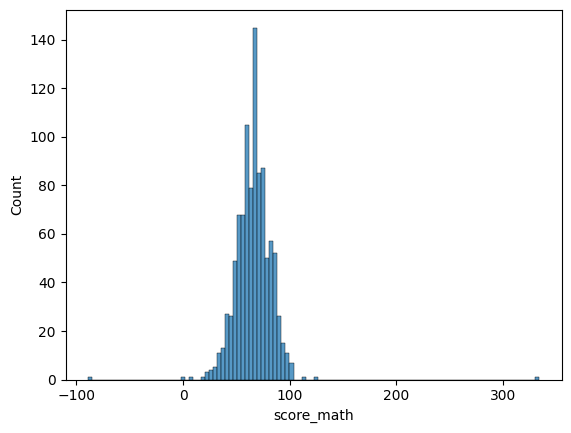

In [ ]:
sns.histplot(df.score_math)

<Axes: xlabel='score_reading', ylabel='Count'>

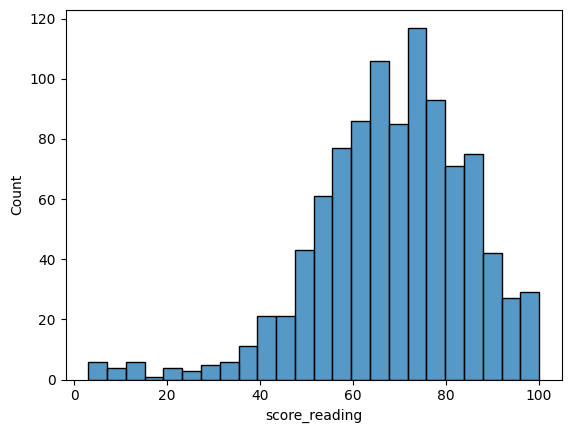

In [ ]:
sns.histplot(df.score_reading)

<Axes: xlabel='score_writing', ylabel='Count'>

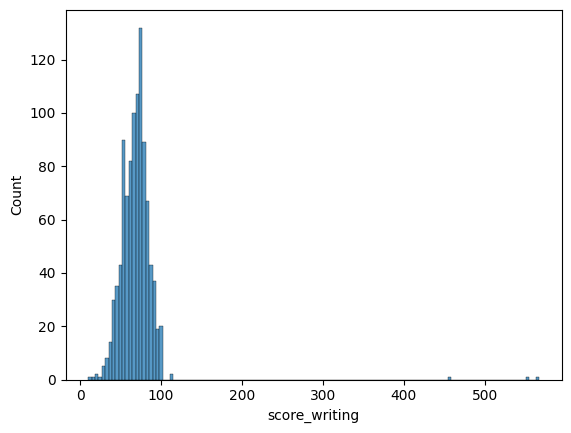

In [ ]:
sns.histplot(df.score_writing)

#### Removing Outliers
Using IGR (Inter Quartile Range) for removing Outliers

IQR = Quartile3 – Quartile1

Syntax: numpy.percentile(arr, n, axis=None, out=None)
Parameters :
* arr :input array.
* n : percentile value

In [ ]:
def remove_outliers(
    feature_name: str
):
    global ds
    q3 , q1 = np.percentile( ds[ feature_name ] , [ 75 , 25 ] )
    iqr = q3 - q1
    ds = ds[ (ds[ feature_name ] >= q1 - 1.5 * iqr) & (ds[ feature_name ] <= q3 + 1.5 * iqr) ]

In [ ]:
def removeOutliers(feature:str):
    global df
    q3 = np.percentile(df[feature],75)
    q1 = np.percentile(df[feature],25)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df = df[(df[feature] > lower) & (df[feature] < upper)]

In [ ]:
removeOutliers('score_math')
removeOutliers('score_reading')
removeOutliers('score_writing')

<Axes: xlabel='score_math', ylabel='Count'>

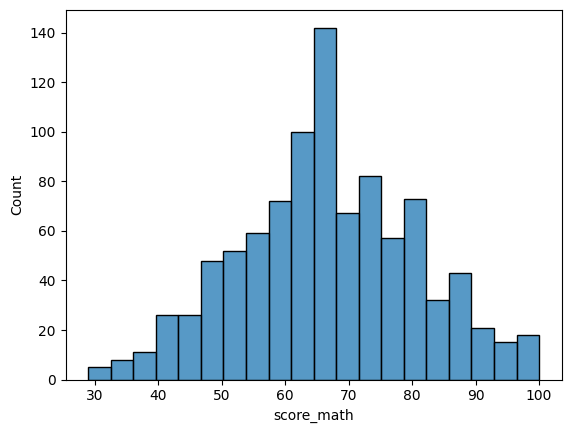

In [ ]:
sns.histplot(df.score_math)

<Axes: xlabel='score_writing', ylabel='Count'>

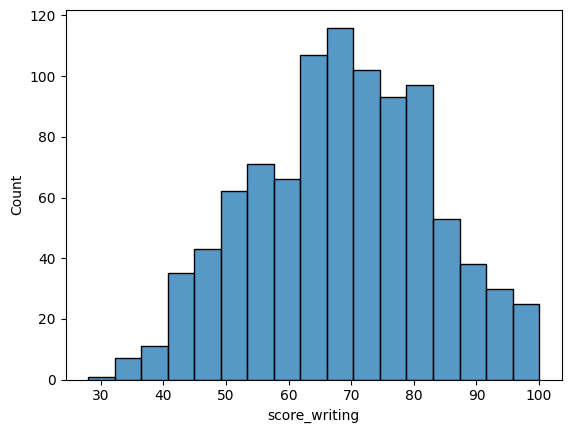

In [ ]:
sns.histplot(df.score_writing)

In [ ]:
df.dtypes

gender               object
race                 object
parent_edu           object
lunch                object
course_completed     object
score_math          float64
score_reading       float64
score_writing       float64
dtype: object

In [ ]:
df['score_reading'].skew()

-0.06273448245950487

In [ ]:
from scipy import stats

In [ ]:
df['score_reading'] = np.sqrt(df['score_reading'])

<Axes: xlabel='score_reading', ylabel='Count'>

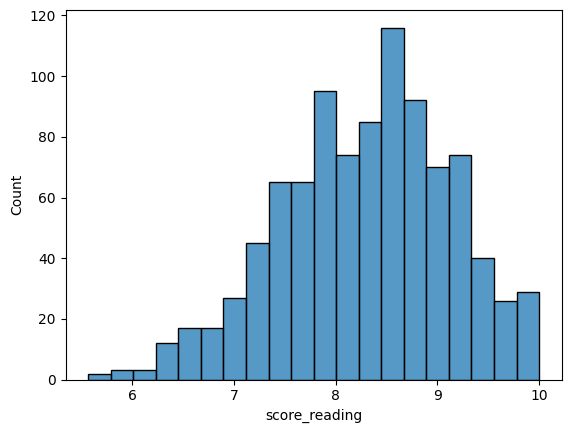

In [ ]:
sns.histplot(df.score_reading)